In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../data/raw/fraudTrain.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
df = df.drop(["Unnamed: 0", "first", "last","cc_num","trans_num","street","merchant","city","zip"], axis=1)
#df

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   category               1296675 non-null  object 
 2   amt                    1296675 non-null  float64
 3   gender                 1296675 non-null  object 
 4   state                  1296675 non-null  object 
 5   lat                    1296675 non-null  float64
 6   long                   1296675 non-null  float64
 7   city_pop               1296675 non-null  int64  
 8   job                    1296675 non-null  object 
 9   dob                    1296675 non-null  object 
 10  unix_time              1296675 non-null  int64  
 11  merch_lat              1296675 non-null  float64
 12  merch_long             1296675 non-null  float64
 13  is_fraud               1296675 non-null  int64  
dtypes: float64(5), int

In [8]:
df.nunique()

trans_date_trans_time    1274791
category                      14
amt                        52928
gender                         2
state                         51
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [9]:

date_list = []
time_list = []
for row in df["trans_date_trans_time"]:
    date_list.append(row[0:10])
    time_list.append(row[11:19])


In [10]:
time_list

['00:00:18',
 '00:00:44',
 '00:00:51',
 '00:01:16',
 '00:03:06',
 '00:04:08',
 '00:04:42',
 '00:05:08',
 '00:05:18',
 '00:06:01',
 '00:06:23',
 '00:06:53',
 '00:06:56',
 '00:07:27',
 '00:09:03',
 '00:09:20',
 '00:10:49',
 '00:10:58',
 '00:11:14',
 '00:12:34',
 '00:13:08',
 '00:14:37',
 '00:17:16',
 '00:17:40',
 '00:18:06',
 '00:18:07',
 '00:20:15',
 '00:21:32',
 '00:22:06',
 '00:22:18',
 '00:22:36',
 '00:22:39',
 '00:22:44',
 '00:23:41',
 '00:23:58',
 '00:25:46',
 '00:26:22',
 '00:27:45',
 '00:27:56',
 '00:29:11',
 '00:30:49',
 '00:31:01',
 '00:31:51',
 '00:32:15',
 '00:32:15',
 '00:32:47',
 '00:33:51',
 '00:34:10',
 '00:36:12',
 '00:36:58',
 '00:37:18',
 '00:39:22',
 '00:39:37',
 '00:39:43',
 '00:40:44',
 '00:40:48',
 '00:40:50',
 '00:40:58',
 '00:41:43',
 '00:41:45',
 '00:42:26',
 '00:43:38',
 '00:44:20',
 '00:44:43',
 '00:45:13',
 '00:46:18',
 '00:47:55',
 '00:48:09',
 '00:49:25',
 '00:49:31',
 '00:50:53',
 '00:52:57',
 '00:55:05',
 '00:56:12',
 '00:56:44',
 '00:56:59',
 '00:57:17',

In [11]:
df["gender"].value_counts()

gender
F    709863
M    586812
Name: count, dtype: int64

In [12]:

df["date"] = date_list
df["time"] = time_list
df["gender"] = df["gender"].map({"M":0,"F":1}) # Le damos valor 1 a F porque es mas comun que M
df = df.drop(["trans_date_trans_time", "unix_time"], axis=1)

In [13]:
df

,category,amt,gender,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,date,time
0,misc_net,4.97,1,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019-01-01,00:00:18
1,grocery_pos,107.23,1,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019-01-01,00:00:44
2,entertainment,220.11,0,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019-01-01,00:00:51
3,gas_transport,45.00,0,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,2019-01-01,00:01:16
4,misc_pos,41.96,0,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,2019-01-01,00:03:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,0,UT,37.7175,-112.4777,258,Geoscientist,1961-11-24,36.841266,-111.690765,0,2020-06-21,12:12:08
1296671,food_dining,51.70,0,MD,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,38.906881,-78.246528,0,2020-06-21,12:12:19
1296672,food_dining,105.93,0,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,33.619513,-105.130529,0,2020-06-21,12:12:32
1296673,food_dining,74.90,0,SD,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,42.788940,-103.241160,0,2020-06-21,12:13:36


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   category    1296675 non-null  object 
 1   amt         1296675 non-null  float64
 2   gender      1296675 non-null  int64  
 3   state       1296675 non-null  object 
 4   lat         1296675 non-null  float64
 5   long        1296675 non-null  float64
 6   city_pop    1296675 non-null  int64  
 7   job         1296675 non-null  object 
 8   dob         1296675 non-null  object 
 9   merch_lat   1296675 non-null  float64
 10  merch_long  1296675 non-null  float64
 11  is_fraud    1296675 non-null  int64  
 12  date        1296675 non-null  object 
 13  time        1296675 non-null  object 
dtypes: float64(5), int64(3), object(6)
memory usage: 138.5+ MB


In [15]:

df["weekday_name"] = pd.to_datetime(df["date"]).dt.day_name()

# Suponiendo que df es tu DataFrame y 'time' está en formato string tipo 'HH:MM:SS'
df["hour"] = pd.to_datetime(df["time"]).dt.hour  # Extraer la hora como entero (0-23)

# Calcular las variables seno y coseno para la hora
df["hour_sin"] = np.sin(2 * np.pi * df["hour"] / 24)
df["hour_cos"] = np.cos(2 * np.pi * df["hour"] / 24)

df["dob"] = pd.to_datetime(df["dob"])       # Asegurarse de que dob sea tipo fecha
df["date"] = pd.to_datetime(df["date"])     # Suponiendo que tienes una columna con la fecha de la transacción

df["age"] = (df["date"] - df["dob"]).dt.days // 365



/var/folders/89/x4md3dgd5rq3rdz45wlw69m80000gn/T/ipykernel_10129/2338771694.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["hour"] = pd.to_datetime(df["time"]).dt.hour  # Extraer la hora como entero (0-23)


In [16]:
df

,category,amt,gender,state,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,date,time,weekday_name,hour,hour_sin,hour_cos,age
0,misc_net,4.97,1,NC,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,36.011293,-82.048315,0,2019-01-01,00:00:18,Tuesday,0,0.000000e+00,1.0,30
1,grocery_pos,107.23,1,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,49.159047,-118.186462,0,2019-01-01,00:00:44,Tuesday,0,0.000000e+00,1.0,40
2,entertainment,220.11,0,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,43.150704,-112.154481,0,2019-01-01,00:00:51,Tuesday,0,0.000000e+00,1.0,56
3,gas_transport,45.00,0,MT,46.2306,-112.1138,1939,Patent attorney,1967-01-12,47.034331,-112.561071,0,2019-01-01,00:01:16,Tuesday,0,0.000000e+00,1.0,52
4,misc_pos,41.96,0,VA,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,38.674999,-78.632459,0,2019-01-01,00:03:06,Tuesday,0,0.000000e+00,1.0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,0,UT,37.7175,-112.4777,258,Geoscientist,1961-11-24,36.841266,-111.690765,0,2020-06-21,12:12:08,Sunday,12,1.224647e-16,-1.0,58
1296671,food_dining,51.70,0,MD,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,38.906881,-78.246528,0,2020-06-21,12:12:19,Sunday,12,1.224647e-16,-1.0,40
1296672,food_dining,105.93,0,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,33.619513,-105.130529,0,2020-06-21,12:12:32,Sunday,12,1.224647e-16,-1.0,52
1296673,food_dining,74.90,0,SD,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,42.788940,-103.241160,0,2020-06-21,12:13:36,Sunday,12,1.224647e-16,-1.0,39


In [17]:

df = df.drop(["date","time","hour","lat","long","dob","date","time","merch_lat","merch_long"], axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   category      1296675 non-null  object 
 1   amt           1296675 non-null  float64
 2   gender        1296675 non-null  int64  
 3   state         1296675 non-null  object 
 4   city_pop      1296675 non-null  int64  
 5   job           1296675 non-null  object 
 6   is_fraud      1296675 non-null  int64  
 7   weekday_name  1296675 non-null  object 
 8   hour_sin      1296675 non-null  float64
 9   hour_cos      1296675 non-null  float64
 10  age           1296675 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 108.8+ MB


In [19]:
df

,category,amt,gender,state,city_pop,job,is_fraud,weekday_name,hour_sin,hour_cos,age
0,misc_net,4.97,1,NC,3495,"Psychologist, counselling",0,Tuesday,0.000000e+00,1.0,30
1,grocery_pos,107.23,1,WA,149,Special educational needs teacher,0,Tuesday,0.000000e+00,1.0,40
2,entertainment,220.11,0,ID,4154,Nature conservation officer,0,Tuesday,0.000000e+00,1.0,56
3,gas_transport,45.00,0,MT,1939,Patent attorney,0,Tuesday,0.000000e+00,1.0,52
4,misc_pos,41.96,0,VA,99,Dance movement psychotherapist,0,Tuesday,0.000000e+00,1.0,32
...,...,...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,0,UT,258,Geoscientist,0,Sunday,1.224647e-16,-1.0,58
1296671,food_dining,51.70,0,MD,100,"Production assistant, television",0,Sunday,1.224647e-16,-1.0,40
1296672,food_dining,105.93,0,NM,899,Naval architect,0,Sunday,1.224647e-16,-1.0,52
1296673,food_dining,74.90,0,SD,1126,Volunteer coordinator,0,Sunday,1.224647e-16,-1.0,39


In [20]:
df["category"].value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

In [21]:
df["job"].value_counts()

job
Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Information officer              8
Veterinary surgeon               8
Ship broker                      7
Contracting civil engineer       7
Warehouse manager                7
Name: count, Length: 494, dtype: int64

In [22]:
# Diccionario de ocupación a sector
jobs_by_sector = {
    "Finanzas y Contabilidad": [
        "Financial adviser", "Chartered public finance accountant", "Comptroller",
        "Financial trader", "Pensions consultant", "Insurance underwriter",
        "Chartered loss adjuster", "Accounting technician", "Dealer",
        "Futures trader", "Senior tax professional/tax inspector", "Administrator",
        "Insurance risk surveyor", "Insurance broker", "Tax inspector",
        "Freight forwarder", "Commercial/residential surveyor",
        "Accountant, chartered public finance", "Investment analyst", "Patent attorney",
        "Pension scheme manager", "Retail banker", "Investment banker, corporate",
        "Corporate investment banker", "Acupuncturist", "Equities trader",
        "Chartered accountant", "Media planner", "Air broker", "Company secretary",
        "Insurance claims handler", "Chartered legal executive (England and Wales)",
        "Loss adjuster, chartered", "Accountant, chartered certified",
        "Investment banker, operational", "Tax adviser", "Solicitor, Scotland",
        "Legal secretary", "Solicitor", "Accountant, chartered", "Industrial buyer"
    ],
    "Tecnología y Datos": [
        "Systems developer", "IT trainer", "Multimedia programmer",
        "Applications developer", "Engineer, electronics", "Systems analyst",
        "Video editor", "Radiographer, diagnostic", "Product/process development scientist",
        "Information systems manager", "Animator", "Network engineer",
        "Engineer, communications", "Research scientist (maths)",
        "Geophysicist/field seismologist", "Programmer, applications", "IT consultant",
        "Manufacturing systems engineer", "Data scientist", "Programmer, multimedia",
        "Chief Technology Officer", "Database administrator", "Web designer",
        "Telecommunications researcher", "Seismic interpreter", "Engineer, technical sales"
    ],
    "Ingeniería y Construcción": [
        "Naval architect", "Surveyor, land/geomatics", "Materials engineer",
        "Mining engineer", "Energy engineer", "Petroleum engineer",
        "Quantity surveyor", "Engineer, automotive", "Mechanical engineer",
        "Electrical engineer", "Drilling engineer", "Engineer, biomedical",
        "Building surveyor", "Water engineer", "Clothing/textile technologist",
        "Engineer, production", "Engineer, control and instrumentation",
        "Engineer, production", "Engineering geologist", "Engineer, mining",
        "Structural engineer", "Site engineer", "Electronics engineer",
        "Manufacturing engineer", "Engineer, land", "Contractor",
        "Engineer, petroleum", "Engineer, drilling", "Civil engineer, contracting",
        "Engineer, agricultural", "Planning and development surveyor",
        "Building services engineer", "Production engineer",
        "Armed forces logistics/support/administrative officer",
        "Engineer, maintenance", "Aeronautical engineer", "Hydrologist",
        "Control and instrumentation engineer", "Engineer, civil (contracting)",
        "Engineer, broadcasting (operations)", "Engineer, aeronautical",
        "Architectural technologist", "Engineer, civil (consulting)",
        "Engineer, manufacturing", "Engineer, materials", "Broadcast engineer",
        "Engineer, structural", "Hydrogeologist", "Engineer, site",
        "Contracting civil engineer"
    ],
    "Salud y Medicina": [
        "Scientist, audiological", "Podiatrist", "Paramedic",
        "Audiological scientist", "Immunologist", "Counsellor",
        "Psychologist, forensic", "Psychotherapist, child", "Physiotherapist",
        "Counselling psychologist", "Toxicologist", "Scientist, biomedical",
        "Surgeon", "Radiographer, therapeutic", "Forensic psychologist",
        "Dispensing optician", "Exercise physiologist", "Physicist, medical",
        "Learning disability nurse", "Hospital doctor", "Chiropodist",
        "Phytotherapist", "Biomedical scientist", "Medical physicist",
        "Nurse, children's", "Doctor, general practice", "Therapist, sports",
        "Music therapist", "Mental health nurse", "Therapist, art",
        "Doctor, hospital", "Paediatric nurse", "Neurosurgeon",
        "Horticultural therapist", "Scientist, physiological", "Psychiatrist",
        "Clinical research associate", "Sport and exercise psychologist",
        "Clinical biochemist", "Nutritional therapist", "Therapist, drama",
        "Art therapist", "Pharmacist, community", "Health promotion specialist",
        "General practice doctor", "Health visitor", "Clinical embryologist",
        "Pharmacologist", "Clinical psychologist", "Orthoptist",
        "Psychiatric nurse", "Therapist, music", "Physiological scientist",
        "Optometrist", "Diagnostic radiographer", "Community pharmacist",
        "Hospital pharmacist", "Presenter, broadcasting", "Biochemist, clinical",
        "Nurse, mental health", "Research scientist (medical)",
        "Clinical psychologist", "Medical technical officer", "Ambulance person",
        "Scientist, clinical (histocompatibility and immunogenetics)",
        "Pathologist", "Chemist, analytical", "Medical research scientist",
        "Clinical cytogeneticist", "Oncologist", "Homeopath", "Veterinary surgeon"
    ],
    "Educación e Investigación": [
        "Scientist, research (maths)", "Secondary school teacher",
        "Early years teacher", "Librarian, academic",
        "Research scientist (physical sciences)", "Special educational needs teacher",
        "Teacher, special educational needs", "Further education lecturer",
        "English as a second language teacher", "Curator", "Child psychotherapist",
        "Occupational psychologist", "Lecturer, further education",
        "Education officer, museum", "Music tutor", "Lecturer, higher education",
        "Careers information officer", "Teacher, secondary school",
        "Armed forces training and education officer",
        "Teacher, early years/pre", "Museum/gallery conservator",
        "Research scientist (physical sciences)", "Community education officer",
        "Research scientist (life sciences)", "Learning mentor",
        "Higher education careers adviser", "Public librarian",
        "Teaching laboratory technician", "Primary school teacher",
        "Academic librarian", "Environmental education officer",
        "Teacher, English as a foreign language", "TEFL teacher",
        "Associate Professor", "Teacher, adult education", "Professor Emeritus",
        "English as a foreign language teacher", "Careers adviser"
    ],
    "Medios y Comunicación": [
        "Film/video editor", "Copywriter, advertising", "Magazine features editor",
        "Television production assistant", "Science writer", "Radio producer",
        "Radio broadcast assistant", "Television/film/video producer",
        "Press photographer", "Public relations account executive",
        "Editor, commissioning", "Broadcast presenter", "Journalist, newspaper",
        "Producer, radio", "Press sub", "Camera operator", "Gaffer",
        "Editor, film/video", "Furniture designer", "Editor, magazine features",
        "Animator", "Advertising account executive", "Special effects artist",
        "Interpreter", "Commissioning editor", "Illustrator", "Designer, multimedia",
        "Production assistant, radio", "Advertising copywriter",
        "Producer, television/film/video", "Magazine journalist",
        "Production assistant, television", "Public relations officer",
        "Copywriter", "Writer", "Broadcast journalist"
    ],
    "Consultoría y Asesoramiento": [
        "Environmental consultant", "Agricultural consultant",
        "Pensions consultant", "Management consultant", "IT consultant",
        "Public affairs consultant", "Horticultural consultant"
    ],
    "Diseño y Arte": [
        "Exhibition designer", "Designer, ceramics/pottery", "Musician",
        "Fine artist", "Ceramics designer", "Designer, industrial/product",
        "Jewellery designer", "Designer, exhibition/display",
        "Landscape architect", "Glass blower/designer", "Industrial/product designer",
        "Furniture designer", "Architect", "Designer, interior/spatial",
        "Set designer", "Illustrator", "Designer, textile", "Art gallery manager",
        "Jewellery designer", "Visual merchandiser", "Designer, television/film set",
        "Artist", "Interior and spatial designer", "Dancer"
    ],
    "Servicios Sociales y Comunitarios": [
        "Prison officer", "Counsellor", "Psychotherapist, child", "Probation officer",
        "Development worker, community", "Psychologist, counselling",
        "Development worker, international aid", "Police officer",
        "Community arts worker", "Advice worker", "Equality and diversity officer",
        "Administrator, charities/voluntary organisations",
        "Sports development officer", "Psychologist, sport and exercise",
        "Volunteer coordinator", "Arts development officer", "Aid worker",
        "Community education officer", "Sport and exercise psychologist",
        "Immigration officer", "Learning mentor", "Community pharmacist",
        "Environmental health practitioner", "Emergency planning/management officer",
        "Social research officer, government", "Community development worker",
        "Civil Service administrator", "Nature conservation officer",
        "Personnel officer"
    ],
    "Administración y Gestión": [
        "Chief Executive Officer", "Comptroller", "Chief Strategy Officer",
        "Trading standards officer", "Chief Operating Officer",
        "Administrator, local government", "Chief Technology Officer",
        "Health and safety adviser", "Administrator, education",
        "Human resources officer", "Chief Financial Officer",
        "Fitness centre manager", "Health service manager", "Waste management officer",
        "Chief Marketing Officer", "Public house manager", "Farm manager",
        "Theme park manager", "Event organiser", "Theatre manager",
        "Training and development officer", "Logistics and distribution manager",
        "Management consultant", "Armed forces logistics/support/administrative officer",
        "Records manager", "Location manager", "Company secretary",
        "Education administrator", "Retail manager", "Outdoor activities/education manager",
        "Civil Service fast streamer", "Product manager", "Quarry manager",
        "Estate manager/land agent", "Retail merchandiser", "Call centre manager",
        "Travel agency manager", "Leisure centre manager",
        "Tourist information centre manager", "Production manager",
        "Facilities manager", "Pension scheme manager", "Restaurant manager, fast food",
        "Catering manager", "Local government officer", "Hotel manager",
        "Purchasing manager", "Tour manager", "Warehouse manager", "Forest/woodland manager"
    ],
    "Ciencias Ambientales y Naturales": [
        "Environmental consultant", "Geoscientist", "Scientist, marine",
        "Toxicologist", "Surveyor, minerals", "Archaeologist", "Fisheries officer",
        "Amenity horticulturist", "Tree surgeon", "Arboriculturist",
        "Commercial horticulturist", "Soil scientist", "Geochemist",
        "Surveyor, rural practice", "Animal nutritionist", "Herpetologist",
        "Plant breeder/geneticist", "Oceanographer", "Field seismologist",
        "Environmental health practitioner", "Hydrologist",
        "Environmental education officer", "Ecologist", "Water quality scientist"
    ],
    "Legal y Regulador": [
        "Barrister", "Trade mark attorney", "Chartered loss adjuster",
        "Trading standards officer", "Senior tax professional/tax inspector",
        "Licensed conveyancer", "Barrister's clerk", "Patent attorney",
        "Regulatory affairs officer", "Loss adjuster, chartered",
        "Chartered legal executive (England and Wales)", "Solicitor, Scotland",
        "Solicitor", "Legal secretary"
    ],
    "Comercio y Ventas": [
        "Medical sales representative", "Sales professional, IT",
        "Medical sales representative", "Medical sales representative",
        "Sales executive", "Retail buyer", "Industrial buyer",
        "Media buyer", "Bookseller", "Retail buyer", "Commercial horticulturist",
        "Retail merchandiser", "Buyer, industrial", "Sales promotion account executive"
    ],
    "Hostelería y Turismo": [
        "Public house manager", "Theme park manager", "Barista",
        "Tourist information centre manager", "Travel agency manager",
        "Hotel manager", "Restaurant manager, fast food", "Catering manager",
        "Tour manager"
    ],
    "Transporte": [
        "Airline pilot", "Freight forwarder", "Air traffic controller",
        "Transport planner", "Pilot, airline", "Air cabin crew",
        "Cabin crew"
    ],
    "Otros": [
        "Sub", "Make", "Make", "Land", "Artist"
    ]
}

job_to_sector_map = {}
for sector, jobs_list in jobs_by_sector.items():
    for job in jobs_list:
        job_to_sector_map[job] = sector

df["sector"] = df["job"].map(job_to_sector_map)
missing_sector_jobs = df[df["sector"].isna()]


In [23]:
df["sector"].value_counts()

sector
Salud y Medicina                     163096
Ingeniería y Construcción            154703
Medios y Comunicación                 95392
Educación e Investigación             95022
Administración y Gestión              86130
Finanzas y Contabilidad               78556
Servicios Sociales y Comunitarios     68523
Ciencias Ambientales y Naturales      66433
Tecnología y Datos                    65143
Diseño y Arte                         59911
Legal y Regulador                     39450
Comercio y Ventas                     30195
Consultoría y Asesoramiento           15707
Otros                                 15421
Hostelería y Turismo                  14308
Transporte                            12823
Name: count, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 12 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   category      1296675 non-null  object 
 1   amt           1296675 non-null  float64
 2   gender        1296675 non-null  int64  
 3   state         1296675 non-null  object 
 4   city_pop      1296675 non-null  int64  
 5   job           1296675 non-null  object 
 6   is_fraud      1296675 non-null  int64  
 7   weekday_name  1296675 non-null  object 
 8   hour_sin      1296675 non-null  float64
 9   hour_cos      1296675 non-null  float64
 10  age           1296675 non-null  int64  
 11  sector        1060813 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 118.7+ MB


In [25]:
df = df.drop("job", axis=1)
df

,category,amt,gender,state,city_pop,is_fraud,weekday_name,hour_sin,hour_cos,age,sector
0,misc_net,4.97,1,NC,3495,0,Tuesday,0.000000e+00,1.0,30,Servicios Sociales y Comunitarios
1,grocery_pos,107.23,1,WA,149,0,Tuesday,0.000000e+00,1.0,40,Educación e Investigación
2,entertainment,220.11,0,ID,4154,0,Tuesday,0.000000e+00,1.0,56,Servicios Sociales y Comunitarios
3,gas_transport,45.00,0,MT,1939,0,Tuesday,0.000000e+00,1.0,52,Legal y Regulador
4,misc_pos,41.96,0,VA,99,0,Tuesday,0.000000e+00,1.0,32,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1296670,entertainment,15.56,0,UT,258,0,Sunday,1.224647e-16,-1.0,58,Ciencias Ambientales y Naturales
1296671,food_dining,51.70,0,MD,100,0,Sunday,1.224647e-16,-1.0,40,Medios y Comunicación
1296672,food_dining,105.93,0,NM,899,0,Sunday,1.224647e-16,-1.0,52,Ingeniería y Construcción
1296673,food_dining,74.90,0,SD,1126,0,Sunday,1.224647e-16,-1.0,39,Servicios Sociales y Comunitarios


In [26]:
frecuencias = df["state"].value_counts(normalize=True) 
valores_raros = frecuencias[frecuencias < 0.01].index
df['state'] = df['state'].replace(valores_raros, 'others')

In [27]:
df["state"].nunique()

37

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   category      1296675 non-null  object 
 1   amt           1296675 non-null  float64
 2   gender        1296675 non-null  int64  
 3   state         1296675 non-null  object 
 4   city_pop      1296675 non-null  int64  
 5   is_fraud      1296675 non-null  int64  
 6   weekday_name  1296675 non-null  object 
 7   hour_sin      1296675 non-null  float64
 8   hour_cos      1296675 non-null  float64
 9   age           1296675 non-null  int64  
 10  sector        1060813 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 108.8+ MB


In [29]:

df["sector"] = df["sector"].fillna('other')

In [30]:
df.head()

,category,amt,gender,state,city_pop,is_fraud,weekday_name,hour_sin,hour_cos,age,sector
0,misc_net,4.97,1,NC,3495,0,Tuesday,0.0,1.0,30,Servicios Sociales y Comunitarios
1,grocery_pos,107.23,1,WA,149,0,Tuesday,0.0,1.0,40,Educación e Investigación
2,entertainment,220.11,0,others,4154,0,Tuesday,0.0,1.0,56,Servicios Sociales y Comunitarios
3,gas_transport,45.00,0,others,1939,0,Tuesday,0.0,1.0,52,Legal y Regulador
4,misc_pos,41.96,0,VA,99,0,Tuesday,0.0,1.0,32,other


In [31]:
df.to_csv('../data/processed/fraud_processed.csv', index=False)

Repetir lo mismo con el test

In [32]:
df_test = pd.read_csv("../data/raw/fraudTest.csv") 

In [33]:
df_test = df_test.drop(["Unnamed: 0", "first", "last","cc_num","trans_num","street","merchant","city","zip"], axis=1)
date_list = []
time_list = []
for row in df_test["trans_date_trans_time"]:
    date_list.append(row[0:10])
    time_list.append(row[11:19])
    
df_test["date"] = date_list
df_test["time"] = time_list
df_test["gender"] = df_test["gender"].map({"M":0,"F":1}) # Le damos valor 1 a F porque es mas comun que M
df_test = df_test.drop(["trans_date_trans_time", "unix_time"], axis=1)

df_test["weekday_name"] = pd.to_datetime(df_test["date"]).dt.day_name()

# Suponiendo que df es tu DataFrame y 'time' está en formato string tipo 'HH:MM:SS'
df_test["hour"] = pd.to_datetime(df_test["time"]).dt.hour  # Extraer la hora como entero (0-23)

# Calcular las variables seno y coseno para la hora
df_test["hour_sin"] = np.sin(2 * np.pi * df_test["hour"] / 24)
df_test["hour_cos"] = np.cos(2 * np.pi * df_test["hour"] / 24)

df_test["dob"] = pd.to_datetime(df_test["dob"])       # Asegurarse de que dob sea tipo fecha
df_test["date"] = pd.to_datetime(df_test["date"])     # Suponiendo que tienes una columna con la fecha de la transacción

df_test["age"] = (df_test["date"] - df_test["dob"]).dt.days // 365

df_test = df_test.drop(["date","time","hour","lat","long","dob","date","time","merch_lat","merch_long"], axis=1)

df_test["sector"] = df_test["job"].map(job_to_sector_map)
missing_sector_jobs = df_test[df_test["sector"].isna()]

df_test = df_test.drop("job", axis=1)

frecuencias = df_test["state"].value_counts(normalize=True) 
valores_raros = frecuencias[frecuencias < 0.01].index
df_test['state'] = df_test['state'].replace(valores_raros, 'others')

df_test["sector"] = df_test["sector"].fillna('other')

/var/folders/89/x4md3dgd5rq3rdz45wlw69m80000gn/T/ipykernel_10129/1199259715.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test["hour"] = pd.to_datetime(df_test["time"]).dt.hour  # Extraer la hora como entero (0-23)


In [35]:
df_test.to_csv('../data/processed/fraud_test_processed.csv', index=False)

In [36]:
df_test.head()

,category,amt,gender,state,city_pop,is_fraud,weekday_name,hour_sin,hour_cos,age,sector
0,personal_care,2.86,0,SC,333497,0,Sunday,1.224647e-16,-1.0,52,Ingeniería y Construcción
1,personal_care,29.84,1,others,302,0,Sunday,1.224647e-16,-1.0,30,Comercio y Ventas
2,health_fitness,41.28,1,NY,34496,0,Sunday,1.224647e-16,-1.0,49,other
3,misc_pos,60.05,0,FL,54767,0,Sunday,1.224647e-16,-1.0,32,Diseño y Arte
4,travel,3.19,0,MI,1126,0,Sunday,1.224647e-16,-1.0,65,Diseño y Arte


/var/folders/89/x4md3dgd5rq3rdz45wlw69m80000gn/T/ipykernel_10129/3333554065.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="Set2")


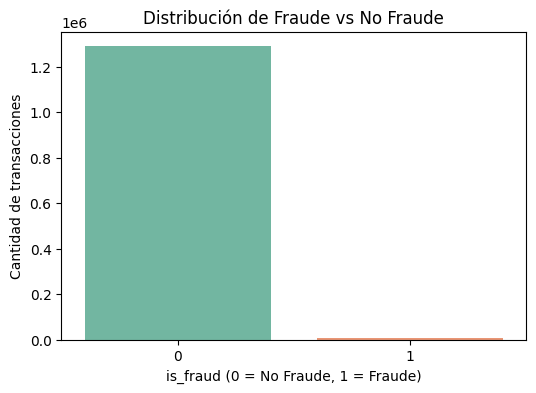

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contamos las clases
counts = df["is_fraud"].value_counts()

# Creamos un gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(x=counts.index, y=counts.values, palette="Set2")

plt.title("Distribución de Fraude vs No Fraude")
plt.xlabel("is_fraud (0 = No Fraude, 1 = Fraude)")
plt.ylabel("Cantidad de transacciones")
plt.show()


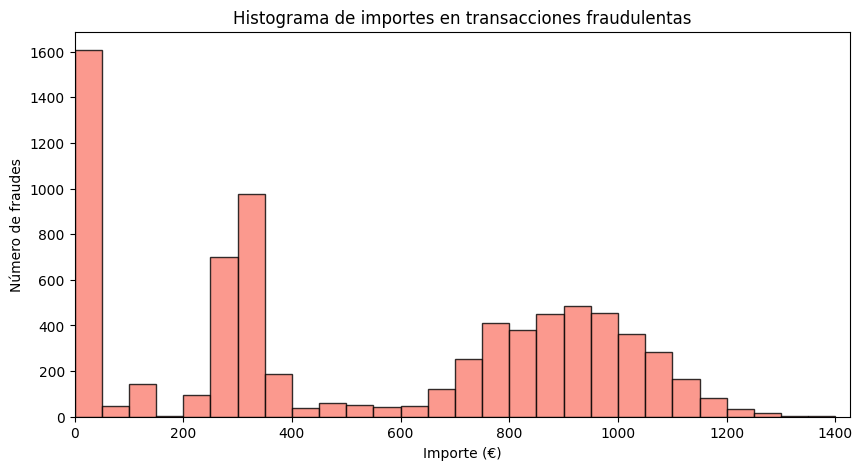

In [50]:
import matplotlib.pyplot as plt
import numpy as np

max_amt = df[df["is_fraud"]==1]["amt"].max()
bins = np.arange(0, max_amt + 50, 50)

plt.figure(figsize=(10,5))
plt.hist(
    df[df["is_fraud"]==1]["amt"],
    bins=bins,
    color="salmon",
    alpha=0.8,
    edgecolor="black"
)

plt.title("Histograma de importes en transacciones fraudulentas")
plt.xlabel("Importe (€)")
plt.ylabel("Número de fraudes")
plt.xlim(0, max_amt + 50)
plt.show()


/var/folders/89/x4md3dgd5rq3rdz45wlw69m80000gn/T/ipykernel_10129/3083434567.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=fraud_sector.index, x=fraud_sector.values, palette="viridis")


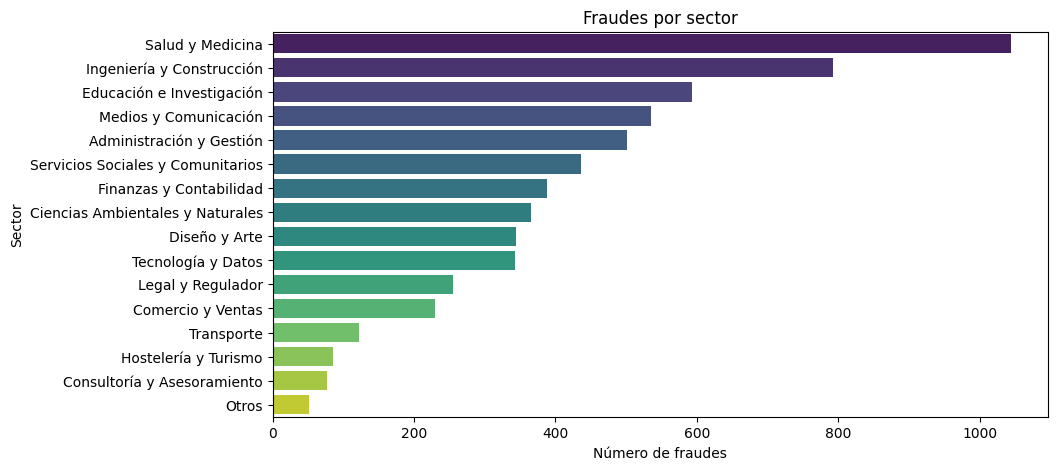

In [45]:
# Contar fraudes por sector
fraud_sector = df[df["is_fraud"]==1]["sector"].value_counts()

# Eliminar el sector 'other' si está presente
if "other" in fraud_sector.index:
    fraud_sector = fraud_sector.drop("other")

# Graficar
plt.figure(figsize=(10,5))
sns.barplot(y=fraud_sector.index, x=fraud_sector.values, palette="viridis")

plt.title("Fraudes por sector")
plt.xlabel("Número de fraudes")
plt.ylabel("Sector")
plt.show()



/var/folders/89/x4md3dgd5rq3rdz45wlw69m80000gn/T/ipykernel_10129/4067842937.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_state_top10.values, y=fraud_state_top10.index, palette="coolwarm")


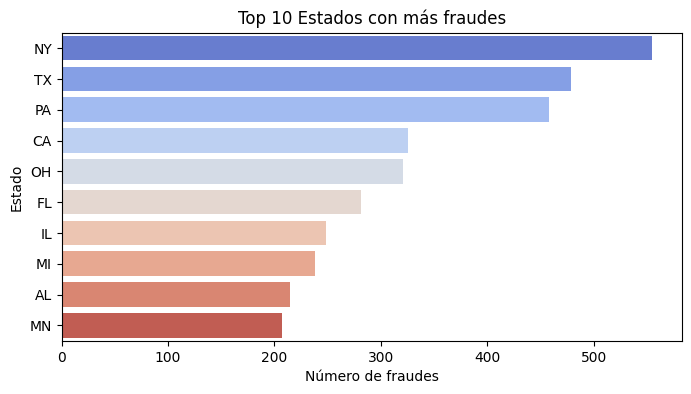

In [44]:
# Contar fraudes por estado
fraud_state = df[df["is_fraud"]==1]["state"].value_counts()

# Eliminar el estado 'others' si está presente
if "others" in fraud_state.index:
    fraud_state = fraud_state.drop("others")

# Seleccionar los 10 primeros
fraud_state_top10 = fraud_state.head(10)

# Graficar
plt.figure(figsize=(8,4))
sns.barplot(x=fraud_state_top10.values, y=fraud_state_top10.index, palette="coolwarm")

plt.title("Top 10 Estados con más fraudes")
plt.xlabel("Número de fraudes")
plt.ylabel("Estado")
plt.show()



/var/folders/89/x4md3dgd5rq3rdz45wlw69m80000gn/T/ipykernel_10129/1826230857.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df["is_fraud"]==1], x="weekday_name", order=[


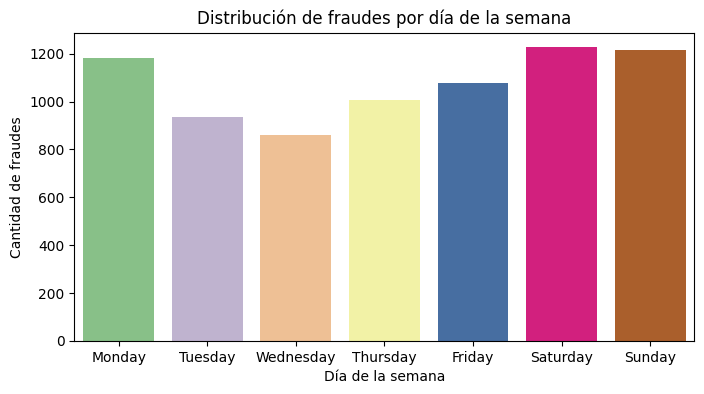

In [41]:
plt.figure(figsize=(8,4))
sns.countplot(data=df[df["is_fraud"]==1], x="weekday_name", order=[
    "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"
], palette="Accent")

plt.title("Distribución de fraudes por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Cantidad de fraudes")
plt.show()


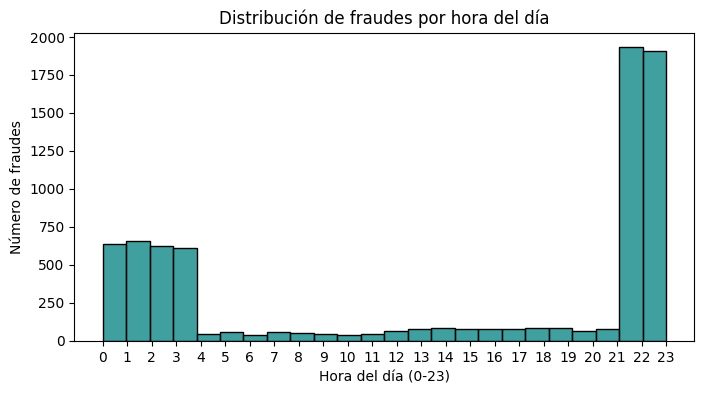

In [43]:
# Calcular ángulo horario en radianes
hora_rad = np.arctan2(
    df[df["is_fraud"]==1]["hour_sin"],
    df[df["is_fraud"]==1]["hour_cos"]
)

# Ajustar al rango [0, 2π)
hora_rad_ajustada = (hora_rad + 2*np.pi) % (2*np.pi)

# Convertir a horas (0 - 24)
horas = hora_rad_ajustada * (24 / (2*np.pi))

# Graficar
plt.figure(figsize=(8,4))
sns.histplot(horas, bins=24, color="teal")

plt.title("Distribución de fraudes por hora del día")
plt.xlabel("Hora del día (0-23)")
plt.ylabel("Número de fraudes")
plt.xticks(range(0,24))
plt.show()


/var/folders/89/x4md3dgd5rq3rdz45wlw69m80000gn/T/ipykernel_10129/99321339.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


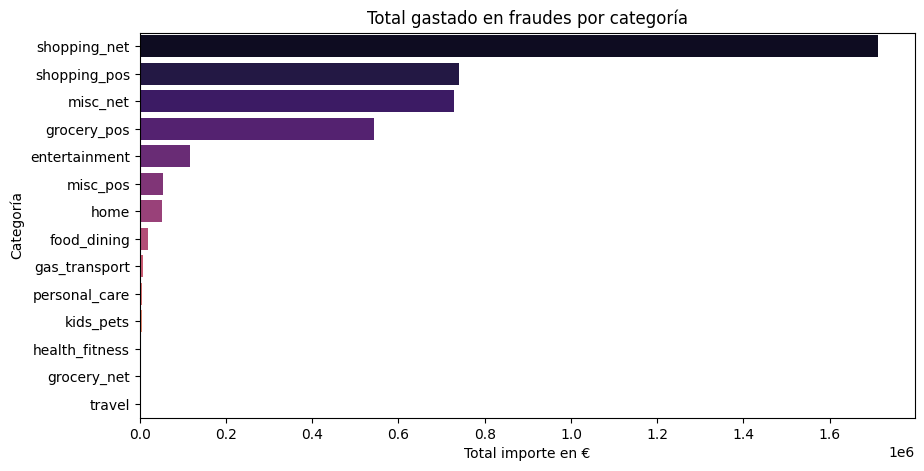

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo las transacciones fraudulentas
solo_fraude = df[df["is_fraud"] == 1]

# Agrupar por categoría y sumar el importe
importe_total_por_categoria = (
    solo_fraude.groupby("category")["amt"]
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
sns.barplot(
    x=importe_total_por_categoria.values,
    y=importe_total_por_categoria.index,
    palette="magma"
)

plt.title("Total gastado en fraudes por categoría")
plt.xlabel("Total importe en €")
plt.ylabel("Categoría")
plt.show()
